## Interpolation

In [1]:
import scipy
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [2]:
m = np.array([500, 750, 1000, 1250, 1500])  # / 1000.0
# m -= m.min()
# m /= m.max()

f = [0.77, 0.92, 0.97, 0.99, 0.999]
g = [0.75, 0.6, 0.57, 0.58, 0.595]
# g = [0.65, 0.7, 0.82, 0.86, 0.90]
# g = np.array(f) - 0.025

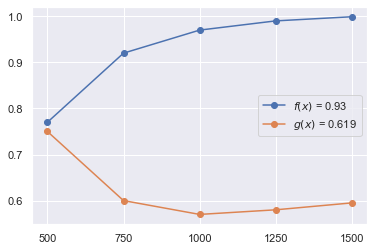

In [213]:
plt.plot(m, f, marker='o', label=r'$f(x)$ = {}'.format(np.mean(f).round(3)))
plt.plot(m, g, marker='o', label=r'$g(x)$ = {}'.format(np.mean(g).round(3)))

plt.xticks(m)
_ = plt.legend()

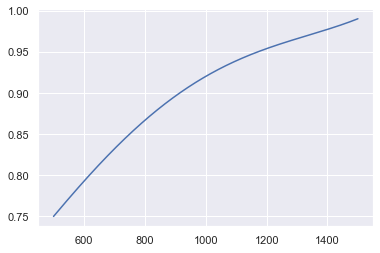

In [214]:
x = np.linspace(m[0], m[-1], 1000)
plt.plot(x, [h_poly(x_) for x_ in x])

In [215]:
# fitting f(x)
h_poly = np.polynomial.Polynomial.fit(m, np.maximum(f, g), deg=4, domain=[np.min(m), np.max(m)])
h_poly

Polynomial([ 0.97      ,  0.05516667, -0.0515    ,  0.05933333, -0.034     ], domain=[ 500., 1500.], window=[-1.,  1.])

In [216]:
# fitting f(x)
f_poly = np.polynomial.Polynomial.fit(m, f, deg=4, domain=[np.min(m), np.max(m)])
f_poly

Polynomial([ 0.97      ,  0.05516667, -0.0515    ,  0.05933333, -0.034     ], domain=[ 500., 1500.], window=[-1.,  1.])

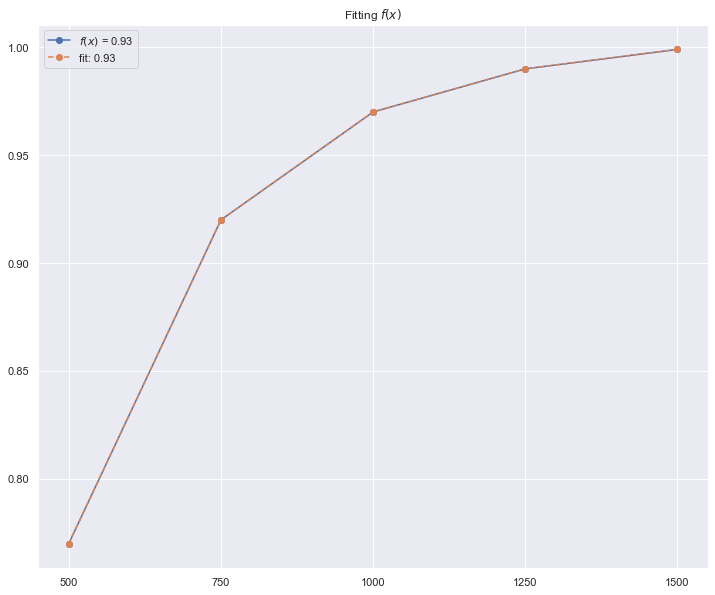

In [217]:
plt.figure(figsize=(12, 10))
plt.title(r'Fitting $f(x)$')

f_fit = [f_poly(x) for x in m]

plt.plot(m, f, marker='o', label=r'$f(x)$ = {}'.format(np.mean(f).round(3)))
plt.plot(m, f_fit, marker='o', linestyle='dashed', label=f'fit: {np.mean(f).round(3)}')

plt.xticks(m)
_ = plt.legend()

In [218]:
# fitting g(x)
g_poly = np.polynomial.Polynomial.fit(m, g, deg=4, domain=[np.min(m), np.max(m)])
g_poly

Polynomial([ 0.57      , -0.00083333,  0.0725    , -0.07666667,  0.03      ], domain=[ 500., 1500.], window=[-1.,  1.])

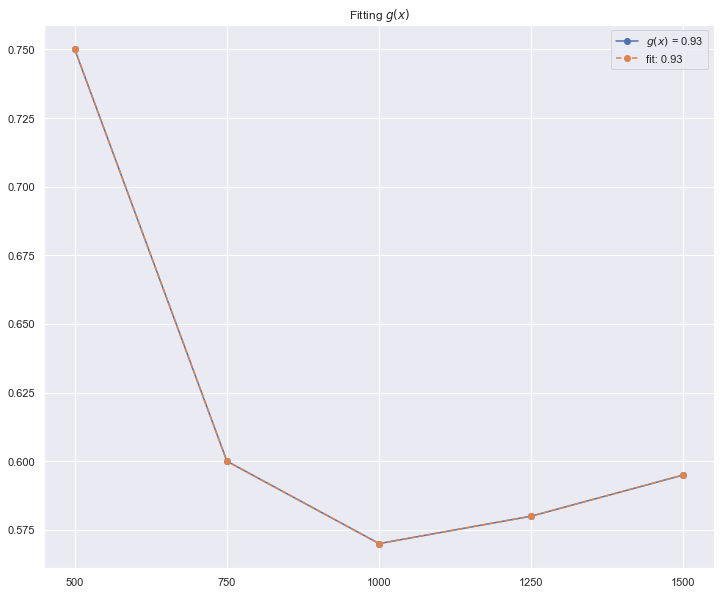

In [219]:
plt.figure(figsize=(12, 10))
plt.title(r'Fitting $g(x)$')

g_fit = [g_poly(x) for x in m]

plt.plot(m, g, marker='o', label=r'$g(x)$ = {}'.format(np.mean(f).round(3)))
plt.plot(m, g_fit, marker='o', linestyle='dashed', label=f'fit: {np.mean(f).round(3)}')

plt.xticks(m)
_ = plt.legend()

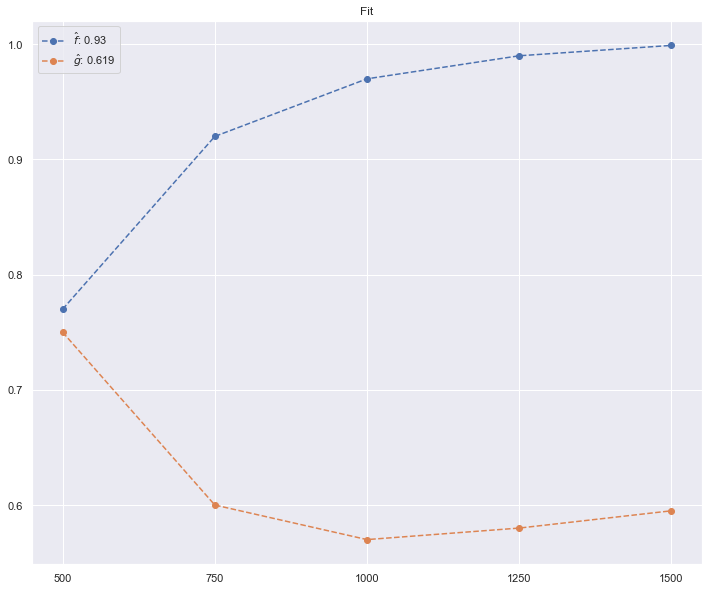

In [220]:
plt.figure(figsize=(12, 10))
plt.title('Fit')

plt.plot(m, f_fit, marker='o', linestyle='dashed', label=r'$\hat f$: {}'.format(np.mean(f_fit).round(3)))
plt.plot(m, g_fit, marker='o', linestyle='dashed', label=r'$\hat g$: {}'.format(np.mean(g_fit).round(3)))

plt.xticks(m)
_ = plt.legend()

In [221]:
# interpolaion-metric computation
y, err = scipy.integrate.quad(lambda x: g_poly(x) - f_poly(x), a=np.min(m), b=np.max(m))
y, err

(-345.86666666666633, 3.839891367836871e-12)

In [222]:
y_max, err = scipy.integrate.quad(f_poly, a=np.min(m), b=np.max(m))
y_max, err

(946.0333333333328, 1.0503079887295517e-11)

In [227]:
a, _ = scipy.integrate.quad(g_poly, a=np.min(m), b=np.max(m))
b, _ = scipy.integrate.quad(f_poly, a=np.min(m), b=np.max(m))

a / b

0.6344032979810439

In [228]:
(b - a) / b

0.36559670201895605

In [18]:
def interpolation(x: list, f: list, g: list, degree: int = None, exact=True):
    """How much `g` in % accounts for the performance of `f`:
        - If f > g, then interpolation < 0.
        - If f < g, then interpolation > 0.
    """
    assert len(f) == len(g) and len(x) == len(f)
    
    if not exact:
        # approximate by taking the mean
        return np.mean(g) / np.mean(f)
    
    domain = (np.min(x), np.max(x))
    degree = len(f) - 1 if degree is None else int(degree)
    
    # fit curve to given points
    f_poly = np.polynomial.Polynomial.fit(x, f, deg=degree, domain=domain)
    g_poly = np.polynomial.Polynomial.fit(x, g, deg=degree, domain=domain)
    
    # compute area (intergrate them)
    f_area, f_err = scipy.integrate.quad(f_poly, a=domain[0], b=domain[1])
    g_area, g_err = scipy.integrate.quad(g_poly, a=domain[0], b=domain[1])
    
    # return fraction of area, and total numerical error
    return g_area / f_area, f_err + g_err

In [19]:
def interpolation_gain(x: list, f: list, g: list, degree: int = None, exact=True):
    """How much in % `g` loses (or gains) compared to `f`'s performances:
        - If f > g, the gain is negative: `g` performs worse than `f`.
        - If f < g, the gain is positive (and greater than one): `g` is better than `f`.
    """
    a, err = interpolation(x, f, g, degree=degree, exact=exact)
    return a - 1.0, err

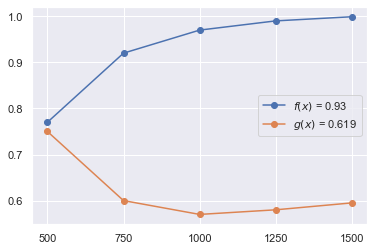

In [3]:
f = [0.77, 0.92, 0.97, 0.99, 0.999]
g = [0.75, 0.6, 0.57, 0.58, 0.595]

plt.plot(m, f, marker='o', label=r'$f(x)$ = {}'.format(np.mean(f).round(3)))
plt.plot(m, g, marker='o', label=r'$g(x)$ = {}'.format(np.mean(g).round(3)))

plt.xticks(m)
_ = plt.legend()

In [16]:
interpolation(x=m, f=f, g=g)[0], interpolation_gain(x=m, f=f, g=g)[0]

(0.6344032979810439, -0.3655967020189561)

In [17]:
interpolation(x=m, f=g, g=f)[0], interpolation_gain(x=m, f=g, g=f)[0]

(1.57628436545404, 0.5762843654540399)

In [94]:
def create_fn(y_data: list, x_data: list, bins=50):
    """Makes a pievewise-linear function from given (x, y) coords"""
    x_pieces = []
    y_pieces = []
    
    x = np.array(x_data)
    y = np.array(y_data)
    
    for a, b in zip(x, x[1:]):
        x_pieces.append(np.linspace(a, b, num=bins))
    
    for a, b in zip(y, y[1:]):
        y_pieces.append(np.linspace(a, b, num=bins))
    
    x_pieces = np.concatenate(x_pieces, axis=0)
    y_pieces = np.concatenate(y_pieces, axis=0)
    
    def fn(z):
        if z <= x.min():
            return y[0]
        
        if z >= x.max():
            return y[-1]
        
        i = np.argmax(z <= x_pieces)
        return y_pieces[i]
        
    return fn
        

In [97]:
f_fn = create_fn(f, m)
g_fn = create_fn(g, m)